In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import networkx as nx

from lib import TestNetworks as tn
from lib import DigraphConvert as dc

#Read in the control range data as a dictionary keyed by node
import csv
control_range = {}
with open("./dat/SMCR_Result.txt") as csvfile:
    cr_file = csv.reader(csvfile, delimiter='\t', quotechar='|')
    for row in cr_file:
        control_range[int(row[0])] = int(row[1])

#C elegans network; the global thing we want to play with
G = tn.testNet(100)
G = dc.CelegansLabelConvert(G)
nx.set_node_attributes(G,'control_range',control_range)
Gn = G.nodes

#Get lists of neuron types
senseList = [d for n,d in G.nodes_iter(data=True) if 'sensory' in d['type']]
motorList = [d for n,d in G.nodes_iter(data=True) if 'motor' in d['type']]
interList = [d for n,d in G.nodes_iter(data=True) if 'inter' in d['type']]
typeDicts = {'sense':senseList, 'motor':motorList, 'inter':interList}

In [3]:
def neuronData(node_num):
    '''Print simple information about a neuron'''
    this_node = [dat for num,dat in G.nodes_iter(data=True) if(num==node_num)][0]
    print("Neuron number",node_num,"is called",this_node['name'])
    print("This neuron is of type:",this_node['type'])
    print("The control range is",this_node['control_range'])
    
node_widget = widgets.BoundedIntText(
    value=7,
    min=0,
    max=G.number_of_nodes()-1,
    step=1,
    description='Text:',
    disabled=False
)
interact(neuronData,node_num=node_widget);

Neuron number 0 is called URXR
This neuron is of type: sensory, inter
The control range is 87


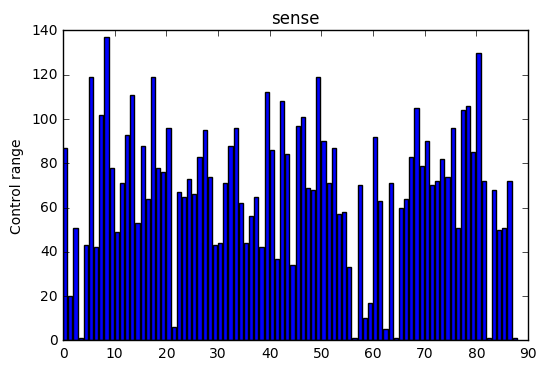

The mean control range for neurons of type sense is 68.4659090909091
The max control range for neurons of type sense is 137
The min control range for neurons of type sense is 1


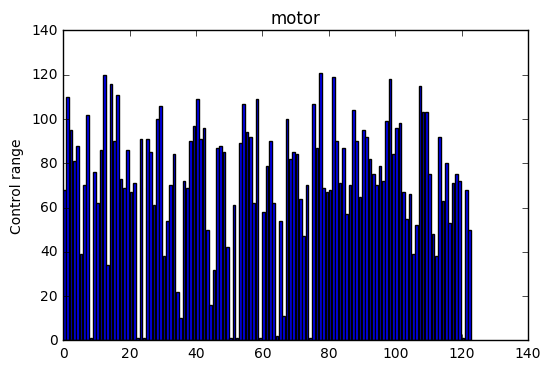

The mean control range for neurons of type motor is 71.35772357723577
The max control range for neurons of type motor is 121
The min control range for neurons of type motor is 1


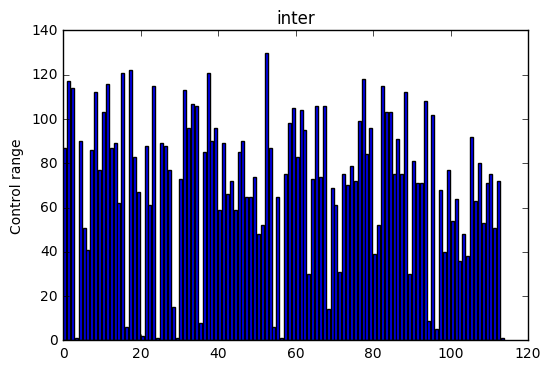

The mean control range for neurons of type inter is 72.09649122807018
The max control range for neurons of type inter is 130
The min control range for neurons of type inter is 1


In [25]:
import matplotlib.pyplot as plt
import statistics as stat

CRDat = {}
for thisType in typeDicts.keys():
    thisList = typeDicts[thisType]
    CRDat[thisType] = [ neuron['control_range'] for neuron in thisList ]
    
    plt.bar(range(0,len(thisList)),CRDat[thisType])
    plt.ylabel('Control range')
    plt.title(thisType)
    plt.show()
    
    print("The mean control range for neurons of type",thisType,"is",stat.mean(CRDat[thisType]))
    print("The max control range for neurons of type",thisType,"is",max(CRDat[thisType]))
    print("The min control range for neurons of type",thisType,"is",min(CRDat[thisType]))
    
    

In [16]:
len(typeDicts['inter'])

114